In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
t = 20        # Número de épocas
q = 13        # Número de padrões (número de dados disponíveis)

eta = 0.01    # Taxa de aprendizado.   Se diminuir, aumentar épocas
m = 2         # Número de neurônios na camada de entrada
N = 1         # Número de neurônios na camada escondida
L = 1         # Número de neurônios na camada de saída

In [ ]:
# Carrega os dados de treinamento
peso = np.array([113, 122, 107, 98, 115, 120, 104, 108, 117, 101, 112, 106, 116])
pH = np.array([6.8, 4.7, 5.2, 3.6, 2.9, 4.2, 6.3, 4.0, 6.3, 4.2, 5.6, 3.1, 5.0])

# Vetor de classificação desejada
d = np.array([-1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1])

In [ ]:
# Inicia aleatoriamente as matrizes de peso
W1 = np.random.random((N, m+1))   # (N, m+1) são as dimensões da matriz 
W2 = np.random.random((L, N+1))

In [ ]:
# Array para armazenar os erros
E = np.zeros(q)     # vetor com q posições
Etm = np.zeros(t)   # vetor do erro total médio. Vetor do tamnaho do número de épocas

In [ ]:
# bias
bias = 1

In [ ]:
# Entrada do Perceptron. Concatenando o vetor peso e o vetor pH. Passa ser uma matriz
X = np.vstack((peso, pH))  # Ou X = np.asarray([peso, pH])

In [ ]:
#=======================
#     TREINAMENTO
#=======================

In [ ]:
for i in range(t):
    for j in range(q):
        
        # Insere o bias no vetor de entrada
        Xb = np.hstack((bias, X[:,j]))
        
        # Saída da camda escondida
        O1 = np.tanh(W1.dot(Xb))     # Equação 1 e 2 juntas
        
        # Incluindo o bias. Saída da camada escondida é a entrada da camada de saída
        O1b = np.insert(O1, 0, bias)
        
        # Neural network output
        Y = np.tanh(W2.dot(O1b))    # Equação 3 e 4 juntas
        
        e = d[j] - Y                # Equação 5
        
        # Erro total
        E[j] = (e.transpose().dot(e))/2  # Equação de erro quadrático
        
        # Imprime o número da época e o Erro total
        # print('i = ' + str(i) + ' E = ' + str(E))
        
        # Error backpropagation
        # Cálculo do gradiente na camada de saída
        delta2 = np.diag(e).dot((1 - Y*Y))          # Eq 6
        vdelta2 = (W2.transpose()).dot(delta2)      # Eq 7
        delta1 = np.diag(1 - O1b*O1b).dot(vdelta2)  # Eq 8
        
        # Atualizção dos pesos
        W1 = W1 + eta*(np.outer(delta1[1:], Xb))
        W2 = W2 + eta*(np.outer(delta2, O1b))
        
    Etm[i] = E.mean()        

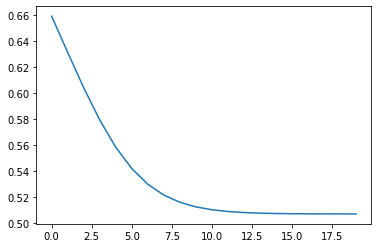

In [ ]:
# print('Erro Total Médio = ' + str(Etm))
plt.plot(Etm)
plt.show()

In [ ]:
#========================
#     TESTE DA REDE
#========================

In [ ]:
Error_Test = np.zeros(q)

In [ ]:
for i in range(q):
    # Insere o bias no vetor de entrada
    Xb = np.hstack((bias, X[:,i]))
        
    # Saída da camda escondida
    O1 = np.tanh(W1.dot(Xb))     # Equação 1 e 2 juntas
        
    # Incluindo o bias. Saída da camada escondida é a entrada da camada de saída
    O1b = np.insert(O1, 0, bias)
        
    # Neural network output
    Y = np.tanh(W2.dot(O1b))    # Equação 3 e 4 juntas
        
    Error_Test[i] = d[i] - Y

In [ ]:
print(Error_Test)

[-1.07989936  0.92010064 -1.07989936  0.92010064  0.92010064  0.92010064
 -1.07989936  0.92010064 -1.07989936  0.92010064 -1.07989936  0.92010064
 -1.07989936]


In [ ]:
print(np.round(Error_Test) - d)   # Vetor de teste de erro menos o vetor d
# Usando a função round pq em uma função hiperbólica geralmente a saída são aproximações

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
#==================
#  GENERALIZAÇÃO
#==================

In [ ]:
# Carrega dados de treinamento
peso = np.array([110, 113, 120, 125, 97])
pH = np.array([6.0, 4.4, 3.5, 5.5, 5.0])

In [ ]:
# Vetor de classificação desejada
d = np.array([-1, -1, 1, 1, 1])

In [ ]:
#=============
#   TESTE
#=============

In [ ]:
Error_Test = np.zeros(5)

In [ ]:
for i in range(5):
    # Insere o bias no vetor de entrada
    Xb = np.hstack((bias, X[:,i]))
        
    # Saída da camda escondida
    O1 = np.tanh(W1.dot(Xb))     # Equação 1 e 2 juntas
        
    # Incluindo o bias. Saída da camada escondida é a entrada da camada de saída
    O1b = np.insert(O1, 0, bias)
        
    # Neural network output
    Y = np.tanh(W2.dot(O1b))    # Equação 3 e 4 juntas
        
    Error_Test[i] = d[i] - Y

In [ ]:
print(Error_Test)

[-1.07989936 -1.07989936  0.92010064  0.92010064  0.92010064]


In [ ]:
print(np.round(Error_Test) - d)   # Vetor de teste de erro menos o vetor d
# Usando a função round pq em uma função hiperbólica geralmente a saída são aproximações

[0. 0. 0. 0. 0.]
